In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**y is our target variable, since clustering is unsupervised learning, there is no use of it.**

In [3]:
data.drop('Type', axis=1, inplace=True)

In [4]:
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.shape

(178, 13)

In [6]:
data = data.drop_duplicates()

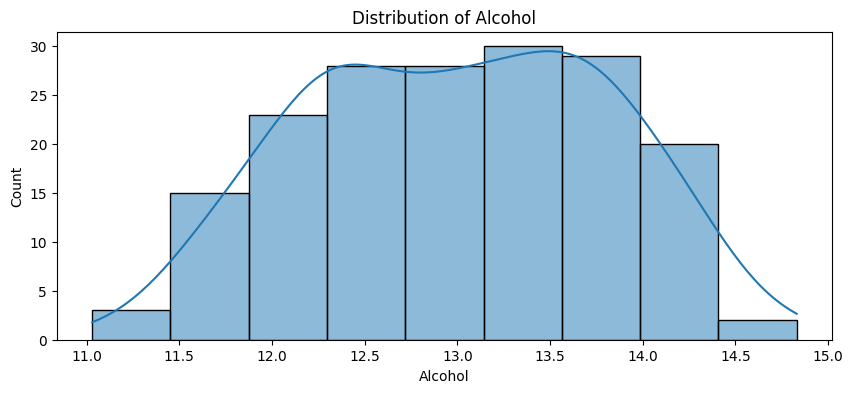

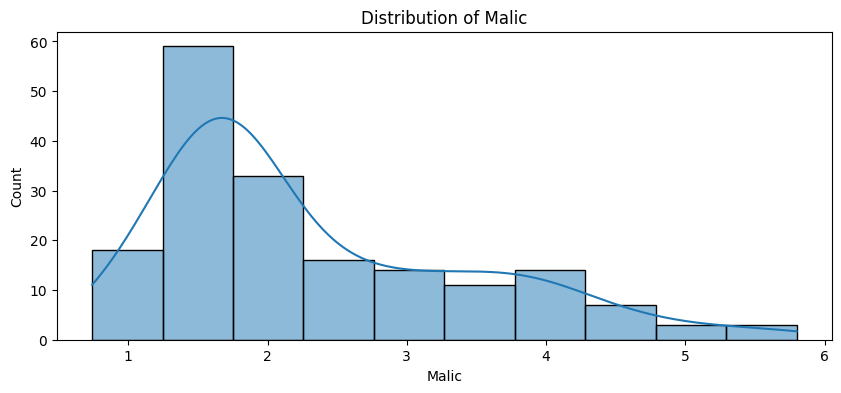

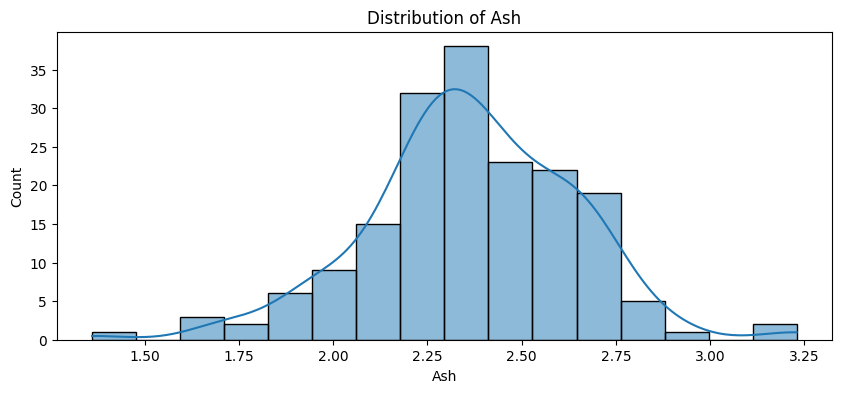

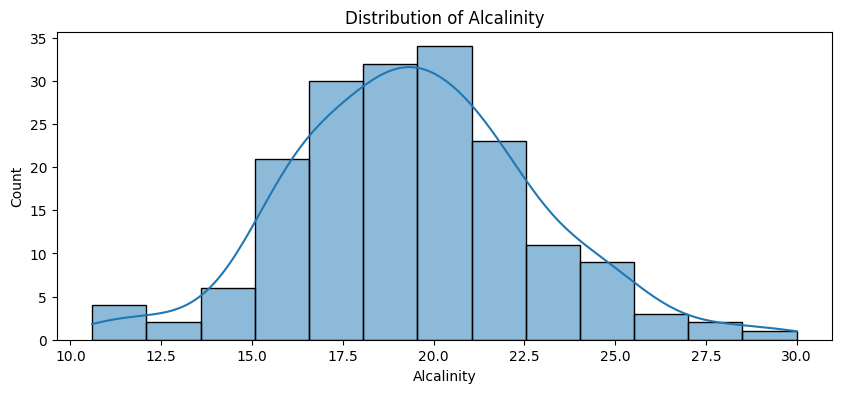

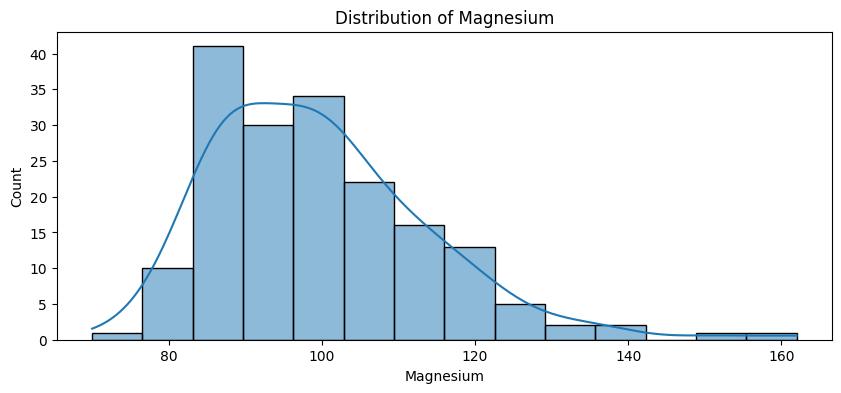

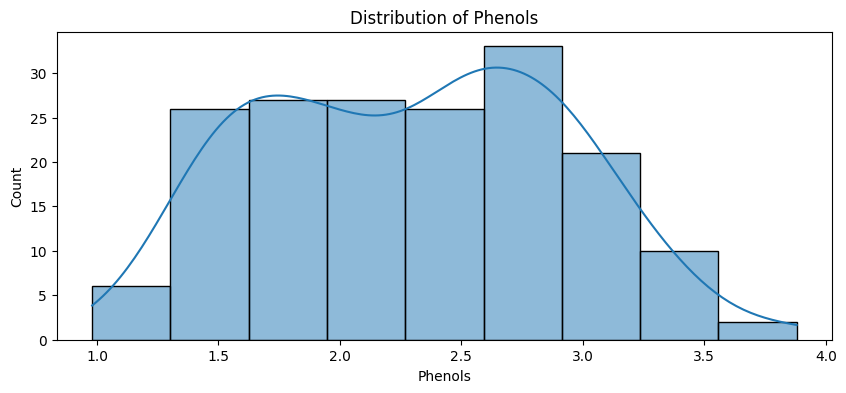

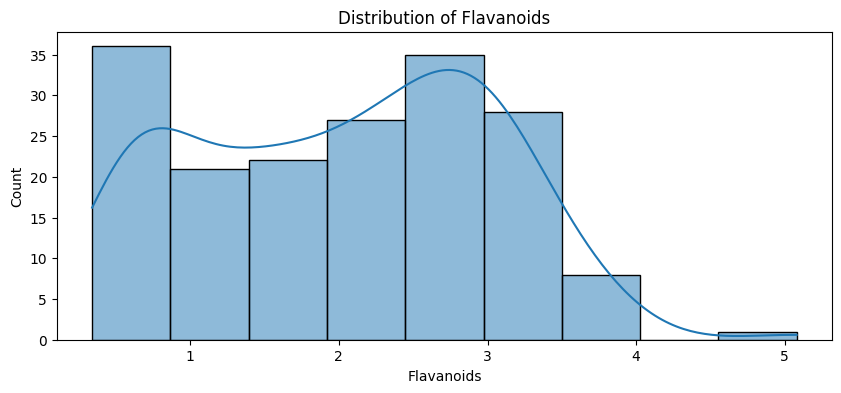

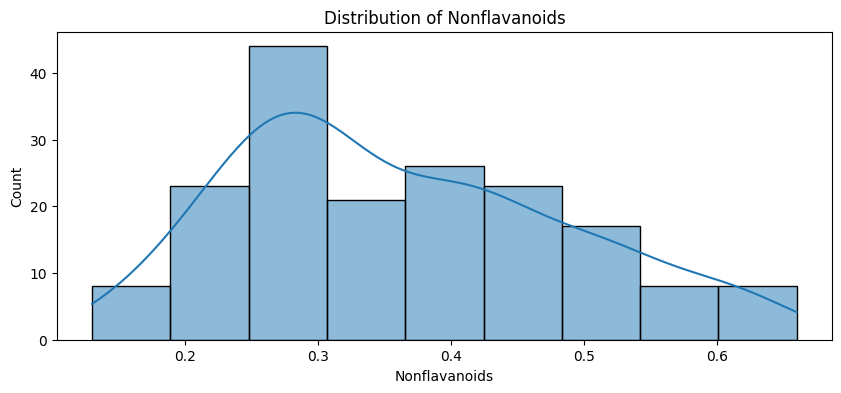

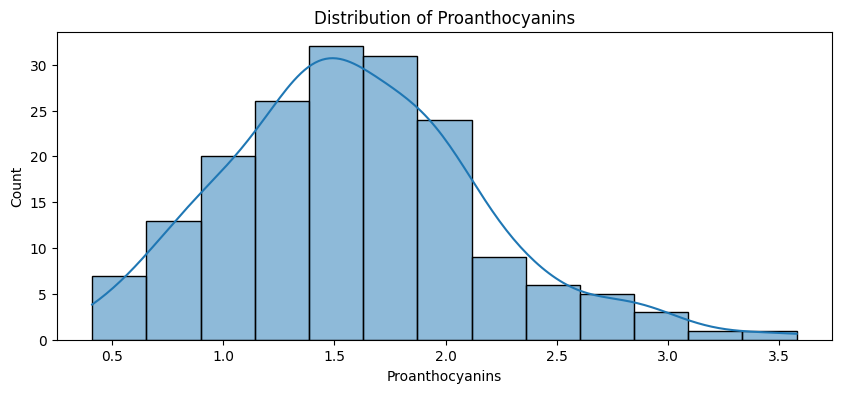

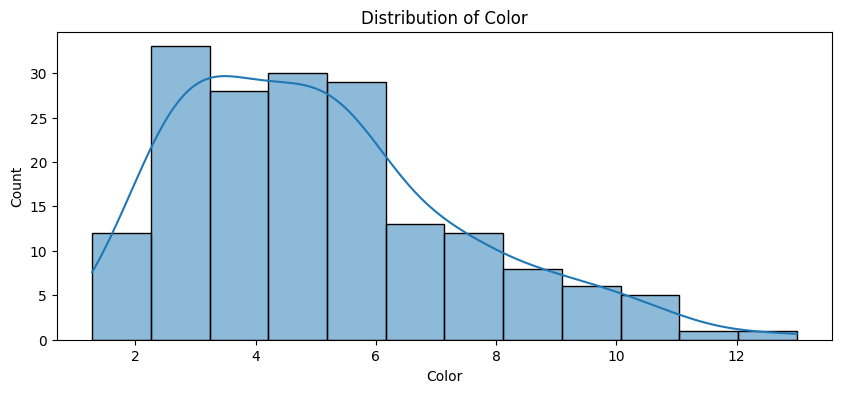

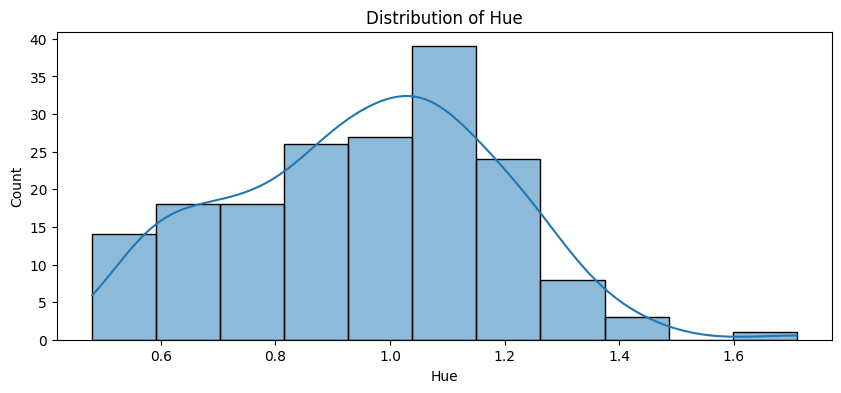

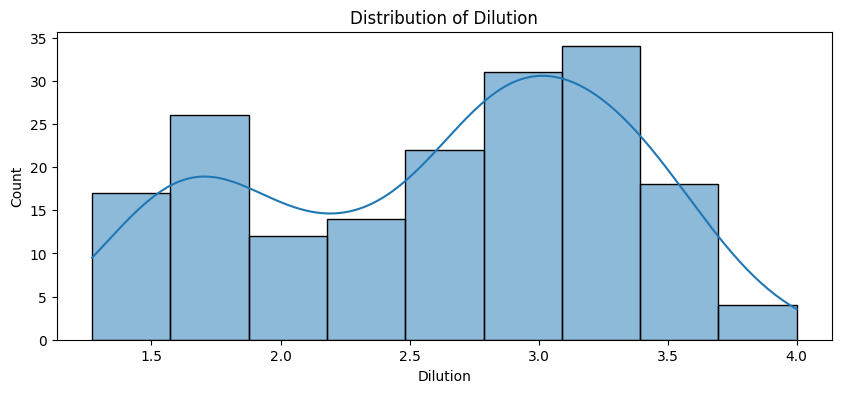

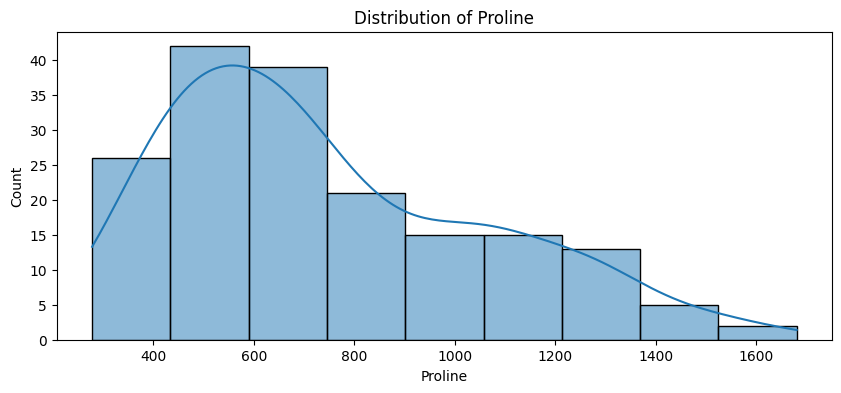

In [7]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [8]:
data.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

**CHECKING FOR OUTLIERS**

<Axes: >

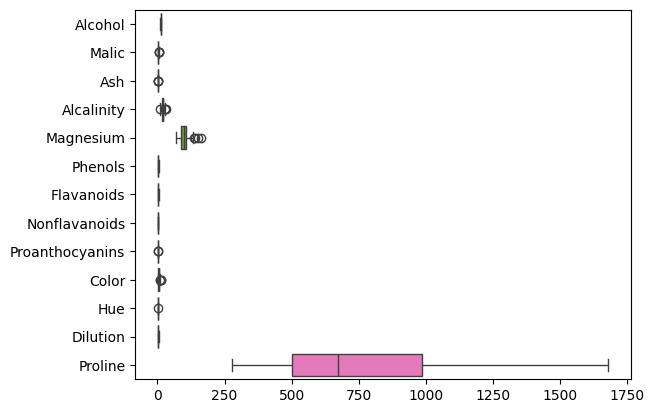

In [9]:
sns.boxplot(data, orient='h')

<ipython-input-10-3a549286e0e9>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Magnesium'])
<ipython-input-10-3a549286e0e9>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Magnesium'])


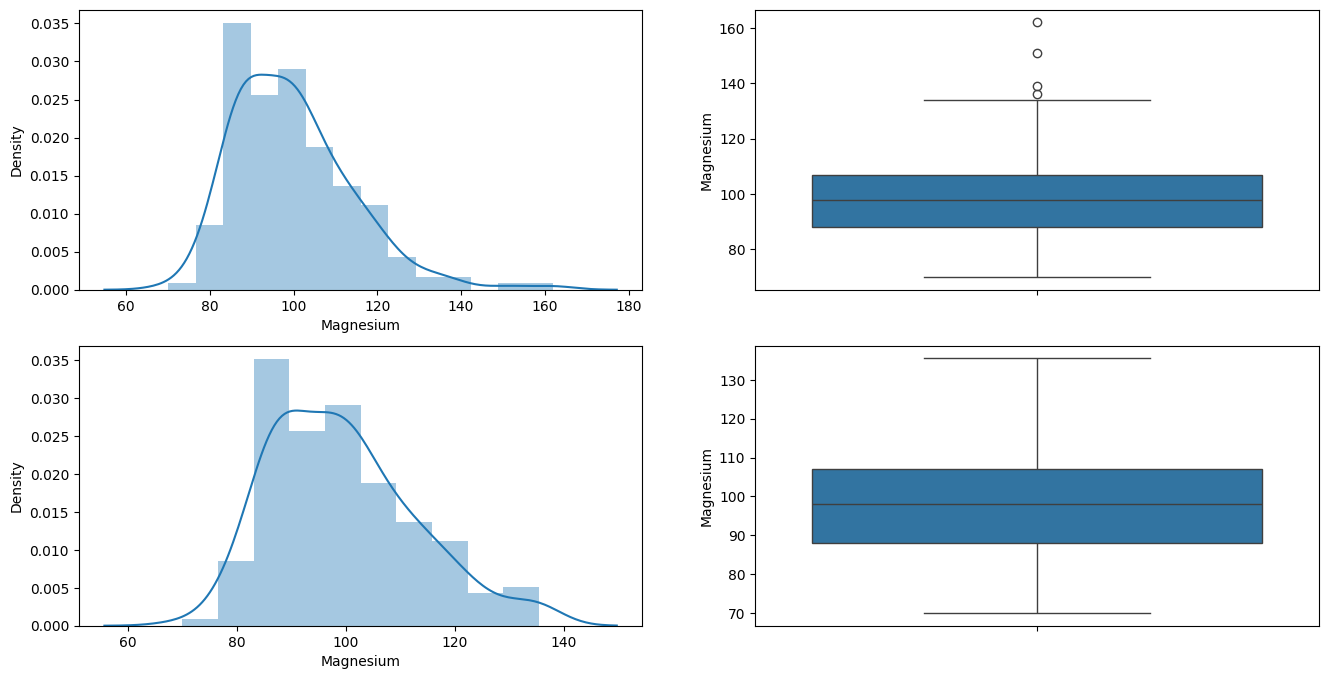

In [10]:
percentile25 = data['Magnesium'].quantile(0.25)
percentile75 = data['Magnesium'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = data.copy()

new_data['Magnesium'] = np.where(
    new_data['Magnesium'] > upper_limit,
    upper_limit,
    np.where(
        new_data['Magnesium'] < lower_limit,
        lower_limit,
        new_data['Magnesium']
    )
)

# Comparing before and after
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Magnesium'])

plt.subplot(2,2,2)
sns.boxplot(data['Magnesium'])

plt.subplot(2,2,3)
sns.distplot(new_data['Magnesium'])

plt.subplot(2,2,4)
sns.boxplot(new_data['Magnesium'])

plt.show()

<ipython-input-11-6dbd2cf62dcc>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Malic'])
<ipython-input-11-6dbd2cf62dcc>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Malic'])


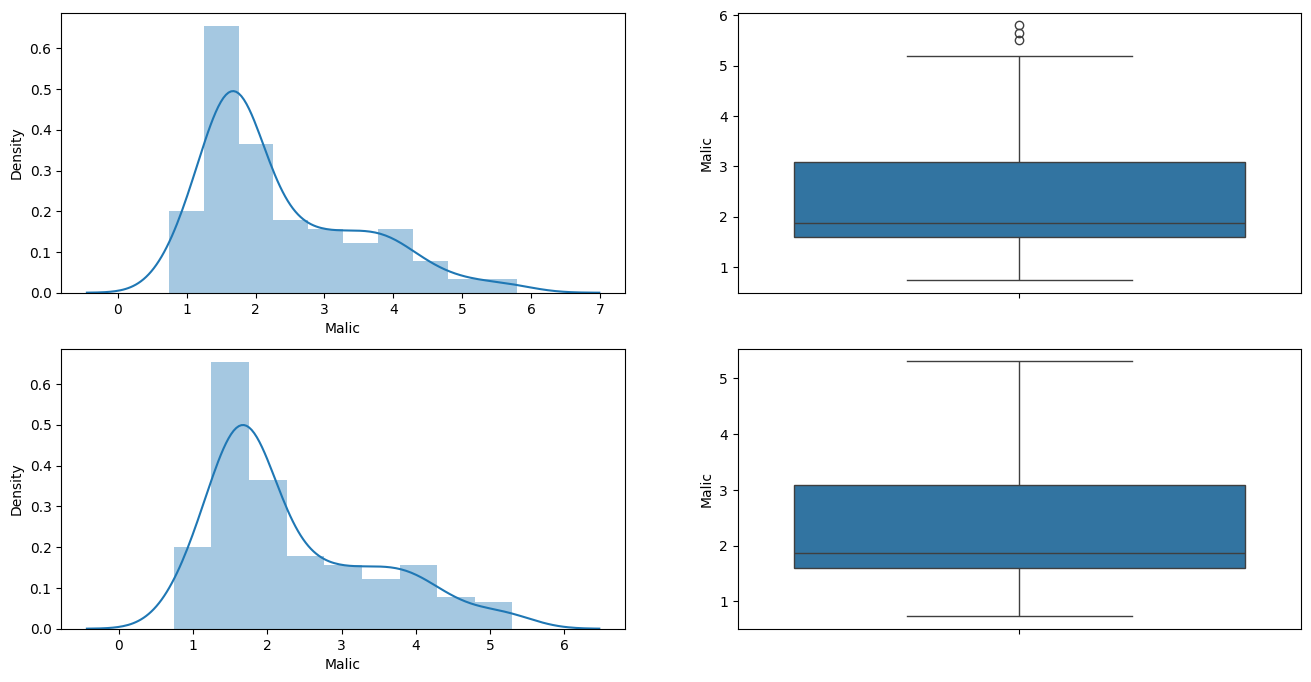

In [11]:
percentile25 = data['Malic'].quantile(0.25)
percentile75 = data['Malic'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = new_data.copy()

new_data['Malic'] = np.where(
    new_data['Malic'] > upper_limit,
    upper_limit,
    np.where(
        new_data['Malic'] < lower_limit,
        lower_limit,
        new_data['Malic']
    )
)

# Comparing before and after
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Malic'])

plt.subplot(2,2,2)
sns.boxplot(data['Malic'])

plt.subplot(2,2,3)
sns.distplot(new_data['Malic'])

plt.subplot(2,2,4)
sns.boxplot(new_data['Malic'])

plt.show()

<ipython-input-12-4ec1c93feb55>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Color'])
<ipython-input-12-4ec1c93feb55>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Color'])


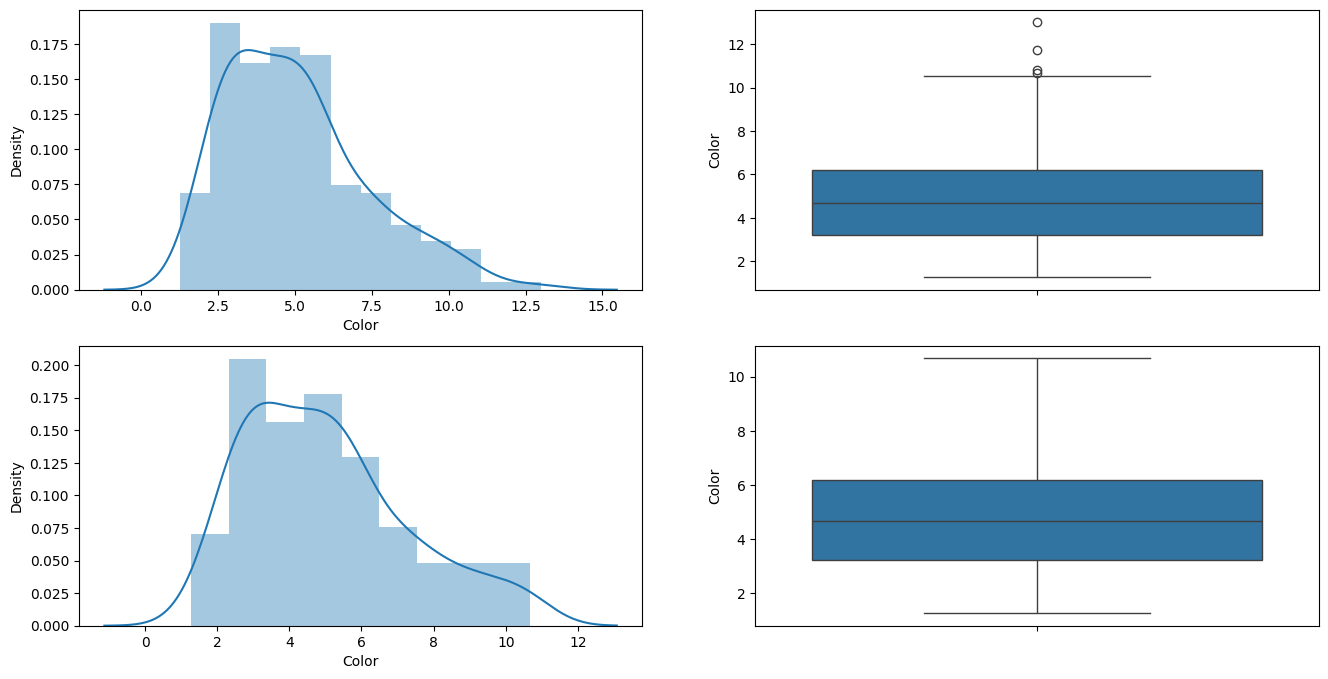

In [12]:
percentile25 = data['Color'].quantile(0.25)
percentile75 = data['Color'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = new_data.copy()

new_data['Color'] = np.where(
    new_data['Color'] > upper_limit,
    upper_limit,
    np.where(
        new_data['Color'] < lower_limit,
        lower_limit,
        new_data['Color']
    )
)

# Comparing before and after
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Color'])

plt.subplot(2,2,2)
sns.boxplot(data['Color'])

plt.subplot(2,2,3)
sns.distplot(new_data['Color'])

plt.subplot(2,2,4)
sns.boxplot(new_data['Color'])

plt.show()

<ipython-input-13-a7d46be9639e>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Alcalinity'])
<ipython-input-13-a7d46be9639e>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Alcalinity'])


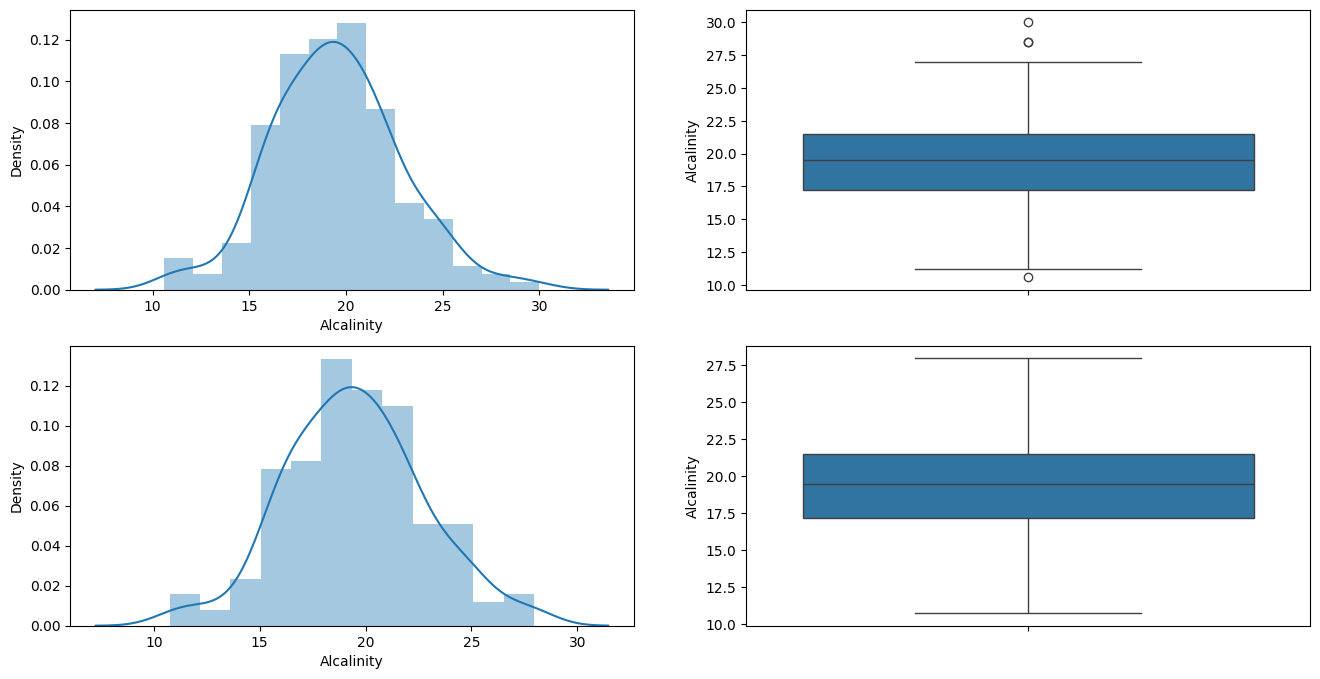

In [13]:
percentile25 = data['Alcalinity'].quantile(0.25)
percentile75 = data['Alcalinity'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = new_data.copy()

new_data['Alcalinity'] = np.where(
    new_data['Alcalinity'] > upper_limit,
    upper_limit,
    np.where(
        new_data['Alcalinity'] < lower_limit,
        lower_limit,
        new_data['Alcalinity']
    )
)

# Comparing before and after
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Alcalinity'])

plt.subplot(2,2,2)
sns.boxplot(data['Alcalinity'])

plt.subplot(2,2,3)
sns.distplot(new_data['Alcalinity'])

plt.subplot(2,2,4)
sns.boxplot(new_data['Alcalinity'])

plt.show()

<ipython-input-14-36dee4130a7e>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Ash'])
<ipython-input-14-36dee4130a7e>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Ash'])


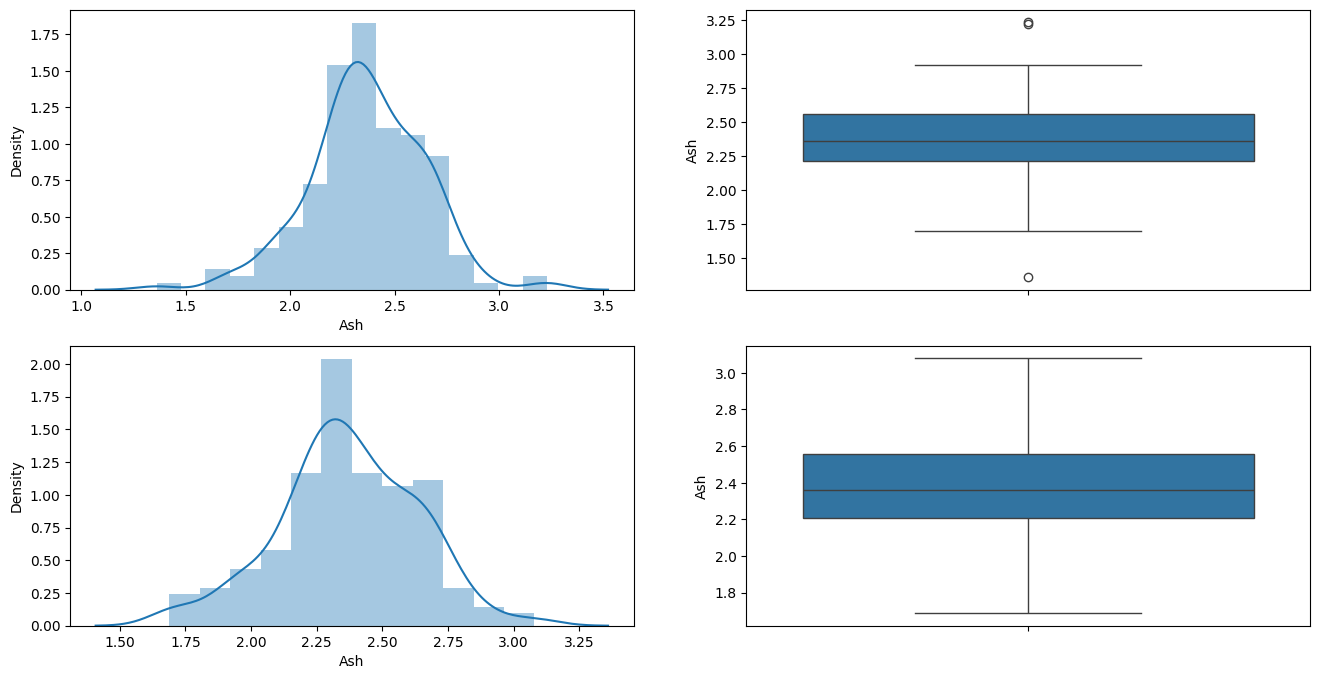

In [14]:
percentile25 = data['Ash'].quantile(0.25)
percentile75 = data['Ash'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_data = new_data.copy()

new_data['Ash'] = np.where(
    new_data['Ash'] > upper_limit,
    upper_limit,
    np.where(
        new_data['Ash'] < lower_limit,
        lower_limit,
        new_data['Ash']
    )
)

# Comparing before and after
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Ash'])

plt.subplot(2,2,2)
sns.boxplot(data['Ash'])

plt.subplot(2,2,3)
sns.distplot(new_data['Ash'])

plt.subplot(2,2,4)
sns.boxplot(new_data['Ash'])

plt.show()

<Axes: >

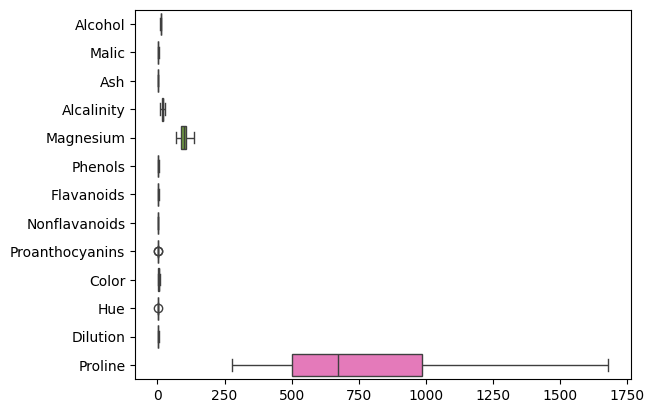

In [15]:
sns.boxplot(new_data, orient='h')

In [16]:
new_data.skew()

Alcohol           -0.051482
Malic              0.969169
Ash               -0.149764
Alcalinity         0.114798
Magnesium          0.670809
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.735453
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

In [17]:
data.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**STANDARD SCALING**

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

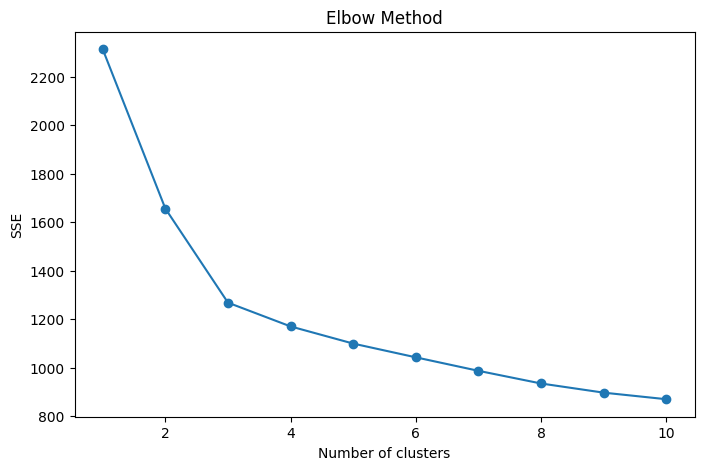

In [19]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

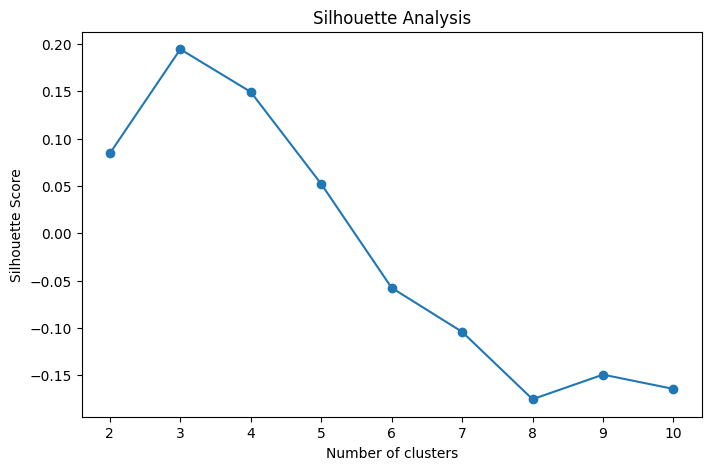

In [20]:
from sklearn.metrics import silhouette_score

# Silhouette analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(new_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

**OPTIMAL NUMBER OF CLUSTERS = 3**

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


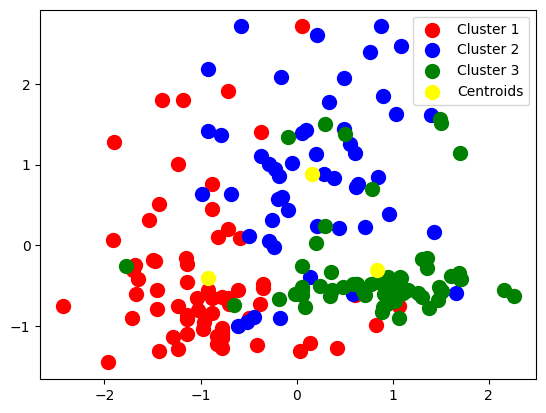

In [22]:
plt.scatter(data_scaled[y_kmeans == 0, 0], data_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_scaled[y_kmeans == 1, 0], data_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_scaled[y_kmeans == 2, 0], data_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


# PCA

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(data_scaled)

In [24]:
pd.DataFrame((pca.explained_variance_ratio_)*100)

,0
0,36.323786
1,19.619625
2,10.906042
3,7.113766
4,6.307818
5,4.833569
6,4.103165
7,2.733781
8,2.235987
9,1.944720


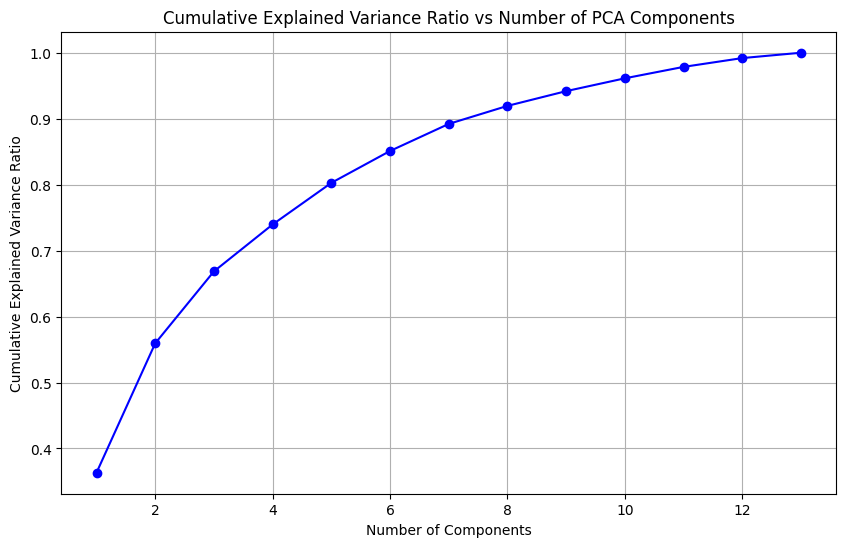

In [25]:
# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
# Plot the cumulative explained variance ratio
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of PCA Components')
plt.grid(True)
plt.show()

In [26]:
# Select the number of components that explain 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of components explaining 95% of the variance: {n_components}')

Number of components explaining 95% of the variance: 10


In [27]:
data_new = pc[:, 0:11]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

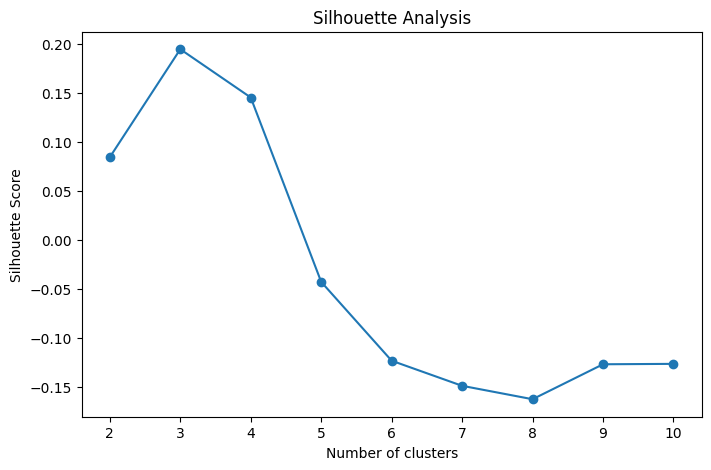

In [28]:
from sklearn.metrics import silhouette_score

# Silhouette analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_new)
    score = silhouette_score(new_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


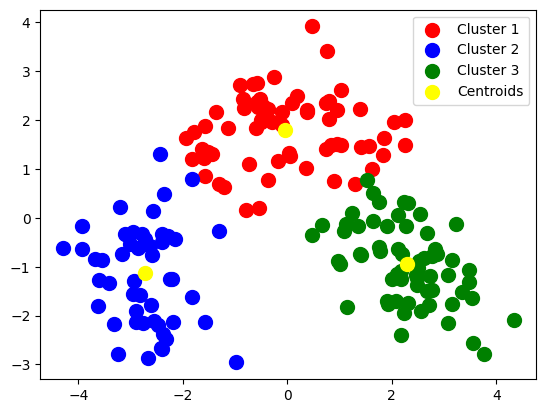

In [30]:
plt.scatter(data_new[y_kmeans == 0, 0], data_new[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_new[y_kmeans == 1, 0], data_new[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_new[y_kmeans == 2, 0], data_new[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


**CONCLUSION :**

After performing PCA, the clusters have become more defined and understandable. PCA has made a significant impact on our model.